# INTRODUCTION

MILESTONE 2

BY      : DZAKI AHMAD FARDIAN

BATCH   : FTDS HCK-024

In this opportunities i want to make a project for Machine Learning Creation using Supervised Classification. The algorithms i used in this project are as follows: KNN, SVM, Decision Tree, Random Forest, and XGBoost. In this project i will use Shopping Behaviour dataset. The purpose of this project is to predict whether a customer will join shopping membership or not. Also i will evaluate each models that i made with F1-Score as evaluation scoring. After the evaluation the best model would be saved and deployed as demo.

# IMPPORT LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import pickle
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer, make_column_selector as selector
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, accuracy_score, f1_score
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold
from sklearn.model_selection import train_test_split


# DATA LOADING

In [2]:
df = pd.read_csv("shopping_behavior_updated.csv")

In [3]:
df

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3895,3896,40,Female,Hoodie,Clothing,28,Virginia,L,Turquoise,Summer,4.2,No,2-Day Shipping,No,No,32,Venmo,Weekly
3896,3897,52,Female,Backpack,Accessories,49,Iowa,L,White,Spring,4.5,No,Store Pickup,No,No,41,Bank Transfer,Bi-Weekly
3897,3898,46,Female,Belt,Accessories,33,New Jersey,L,Green,Spring,2.9,No,Standard,No,No,24,Venmo,Quarterly
3898,3899,44,Female,Shoes,Footwear,77,Minnesota,S,Brown,Summer,3.8,No,Express,No,No,24,Venmo,Weekly


Here's some explanation for columns of this datasets.

- Customer ID	        : Customer ID.
- Age	                : Customer's Age.
- Gender	            : Customer's Gender.
- Item Purchased	    : What kind of items that's purchased. (eg : Sweaters, Sandals, Belt).
- Category	            : Category of items (eg : Clothing, Footwear, Accessories).
- Purchase Amount (USD)	: Customer Spendings for transaction.
- Location	            : Where the customer lives.
- Size	                : Size of items.
- Color	                : Color of items.
- Season	            : When the transactions happens (categorized by season).
- Review Rating	        : Rating for the items.
- Subscription Status	: Membership Status.
- Shipping Type	        : The shipping type that customer choose.
- Discount Applied      : Whether or not the items have discount.
- Promo Code Used      	: Wheter or not the customer using promo code.
- Previous Purchases	: previous customer's spending.
- Payment Method	    : Method of the payment.
- Frequency of Purchases: How often the customer purchase something.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer ID             3900 non-null   int64  
 1   Age                     3900 non-null   int64  
 2   Gender                  3900 non-null   object 
 3   Item Purchased          3900 non-null   object 
 4   Category                3900 non-null   object 
 5   Purchase Amount (USD)   3900 non-null   int64  
 6   Location                3900 non-null   object 
 7   Size                    3900 non-null   object 
 8   Color                   3900 non-null   object 
 9   Season                  3900 non-null   object 
 10  Review Rating           3900 non-null   float64
 11  Subscription Status     3900 non-null   object 
 12  Shipping Type           3900 non-null   object 
 13  Discount Applied        3900 non-null   object 
 14  Promo Code Used         3900 non-null   

In [5]:
df.isnull().sum()

Customer ID               0
Age                       0
Gender                    0
Item Purchased            0
Category                  0
Purchase Amount (USD)     0
Location                  0
Size                      0
Color                     0
Season                    0
Review Rating             0
Subscription Status       0
Shipping Type             0
Discount Applied          0
Promo Code Used           0
Previous Purchases        0
Payment Method            0
Frequency of Purchases    0
dtype: int64

In [6]:
df.duplicated().sum()

0

In [7]:
df = df.rename(columns={'Purchase Amount (USD)': 'Purchase Amount'})

In [8]:
df.drop(['Customer ID'], axis=1, inplace=True)

# EXPLORATORY DATA ANALYSIS (EDA)

## Simple Visualization

The purpose of this visualization is to show the general distribution of the data.

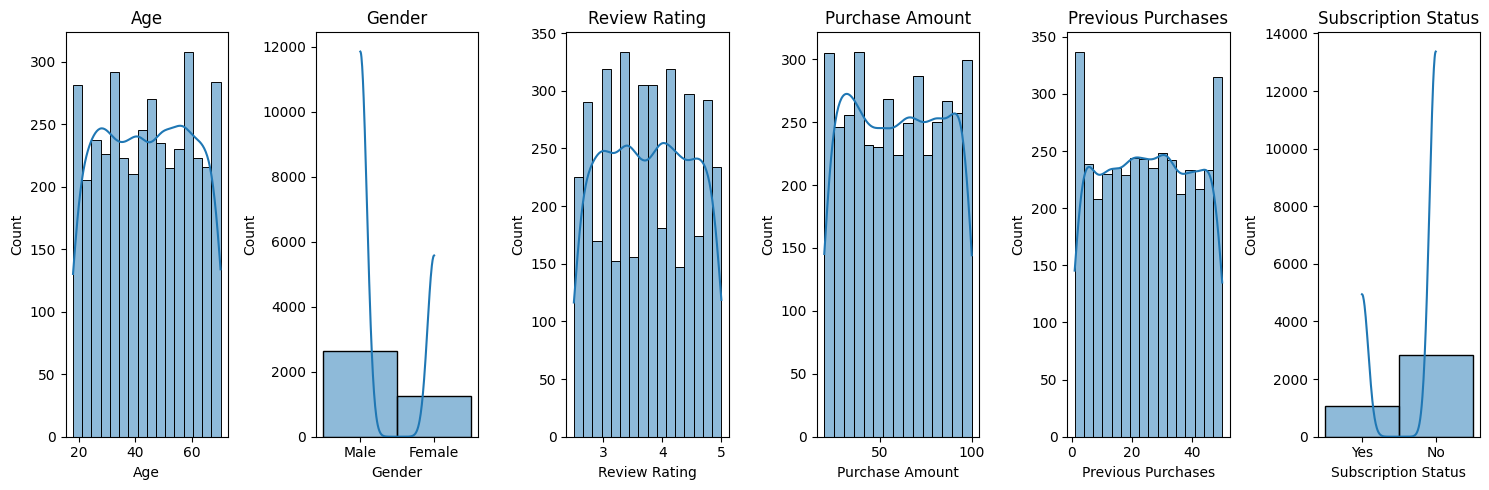

In [9]:
fig, axes = plt.subplots(nrows=1, ncols=6, figsize=(15, 5))
for i, column in enumerate(['Age', 'Gender', 'Review Rating','Purchase Amount', 'Previous Purchases', 'Subscription Status']):
    sns.histplot(data=df, x=column, kde=True, ax=axes[i])
    axes[i].set_title(column)

plt.tight_layout()

**INSIGHT**

- Our sales distribute evenly based on 'Age'.
- Based on 'Gender' we have more Male customer than Female customer.
- 'Review Rating' that given by customer varies between 2.X to 5.0
- The 'Purchase Amount' is evenly spread.
- In case of customer 'Previous Purchases' we can see that its focused more on 2 sides. Alot of customer have small 'Previous Purchases' but there are also alot of them that previously have alot of transaction.
- Last thing, most of our customer did not Subscribe to our company. Its around 2/3 of our customers

## Heatmap for Correlations

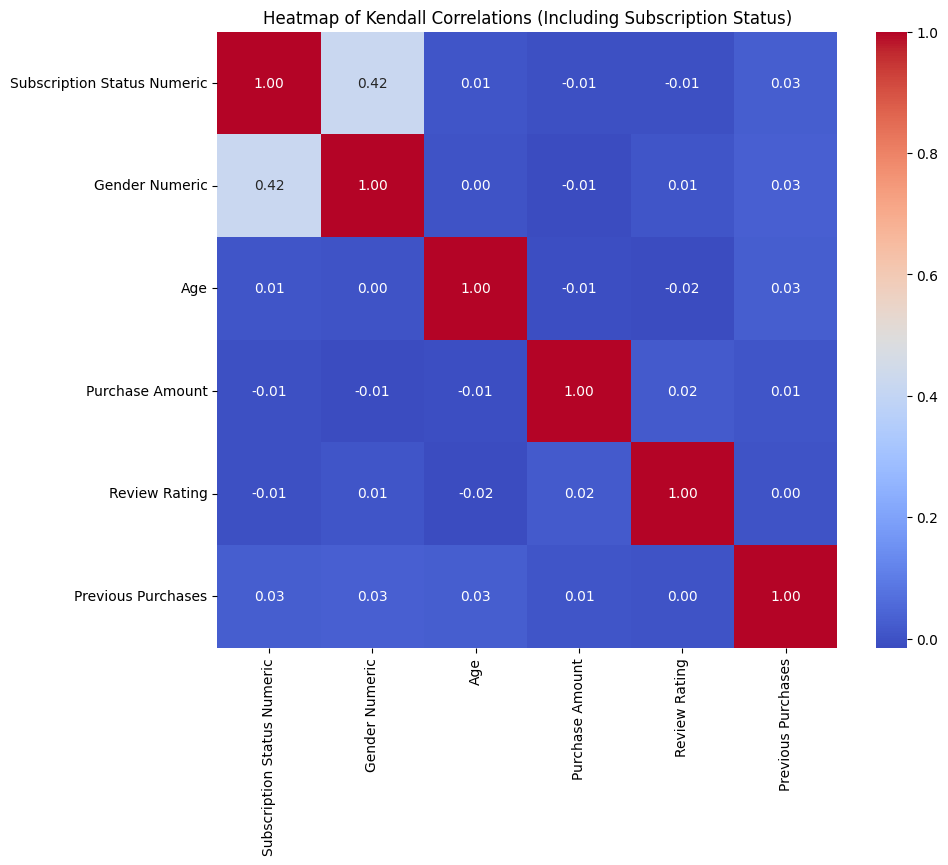

In [10]:
df_2 = df.copy()

df_2['Subscription Status Numeric'] = df_2['Subscription Status'].map({'Yes': 1, 'No': 0})
df_2['Gender Numeric'] = df_2['Gender'].map({'Male': 1, 'Female': 0})
corr = df_2[['Subscription Status Numeric','Gender Numeric' ,'Age', 'Purchase Amount', 'Review Rating', 'Previous Purchases']].corr(method='kendall')

plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Heatmap of Kendall Correlations (Including Subscription Status)')
plt.show()


In [11]:
df.columns

Index(['Age', 'Gender', 'Item Purchased', 'Category', 'Purchase Amount',
       'Location', 'Size', 'Color', 'Season', 'Review Rating',
       'Subscription Status', 'Shipping Type', 'Discount Applied',
       'Promo Code Used', 'Previous Purchases', 'Payment Method',
       'Frequency of Purchases'],
      dtype='object')

On the visualization above, the only one that got correlation with Subscription Status is Gender.

Although its correlation is weak, it is still there.

## Subscription Status vs Purchase Amount



<Axes: xlabel='Subscription Status', ylabel='Purchase Amount'>

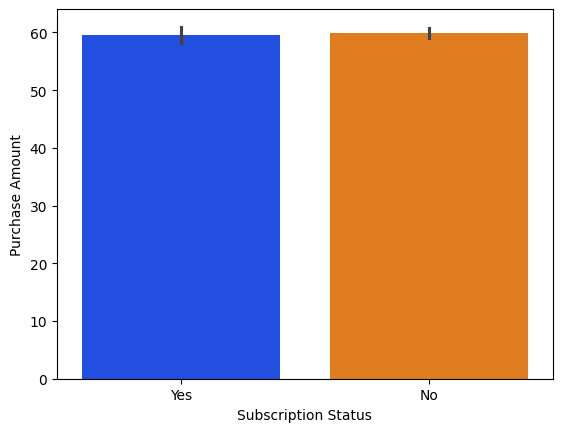

In [12]:
sns.barplot(data=df, x="Subscription Status", y="Purchase Amount",hue="Subscription Status", palette="bright")

The mean of the purchase amount for subscribed and non-subscribed customers is evenly matched.

## Subscription Status vs Previous Purchases

<Axes: xlabel='Subscription Status', ylabel='Previous Purchases'>

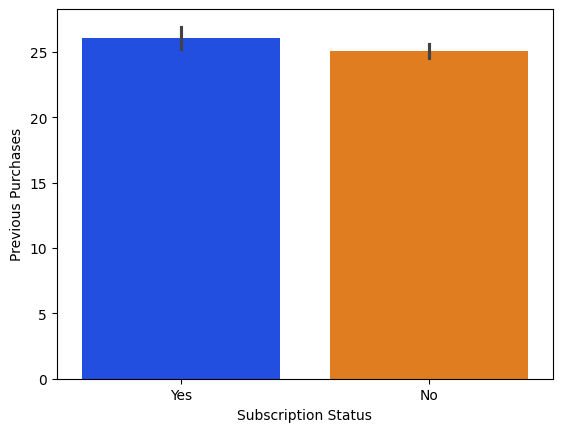

In [13]:
sns.barplot(data=df, x="Subscription Status", y="Previous Purchases",hue="Subscription Status", palette="bright")

The mean of the Previous Purchases amount for subscribed and non-subscribed customers is also evenly matched.

## Subscription Status vs Gender

Below is the distribution of customer's subscription status based on their gender.

C:\Users\ASUS\AppData\Local\Temp\ipykernel_5896\64847967.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=subset_yes, x='Gender', palette='bright')
C:\Users\ASUS\AppData\Local\Temp\ipykernel_5896\64847967.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=subset_no, x='Gender', palette='bright')


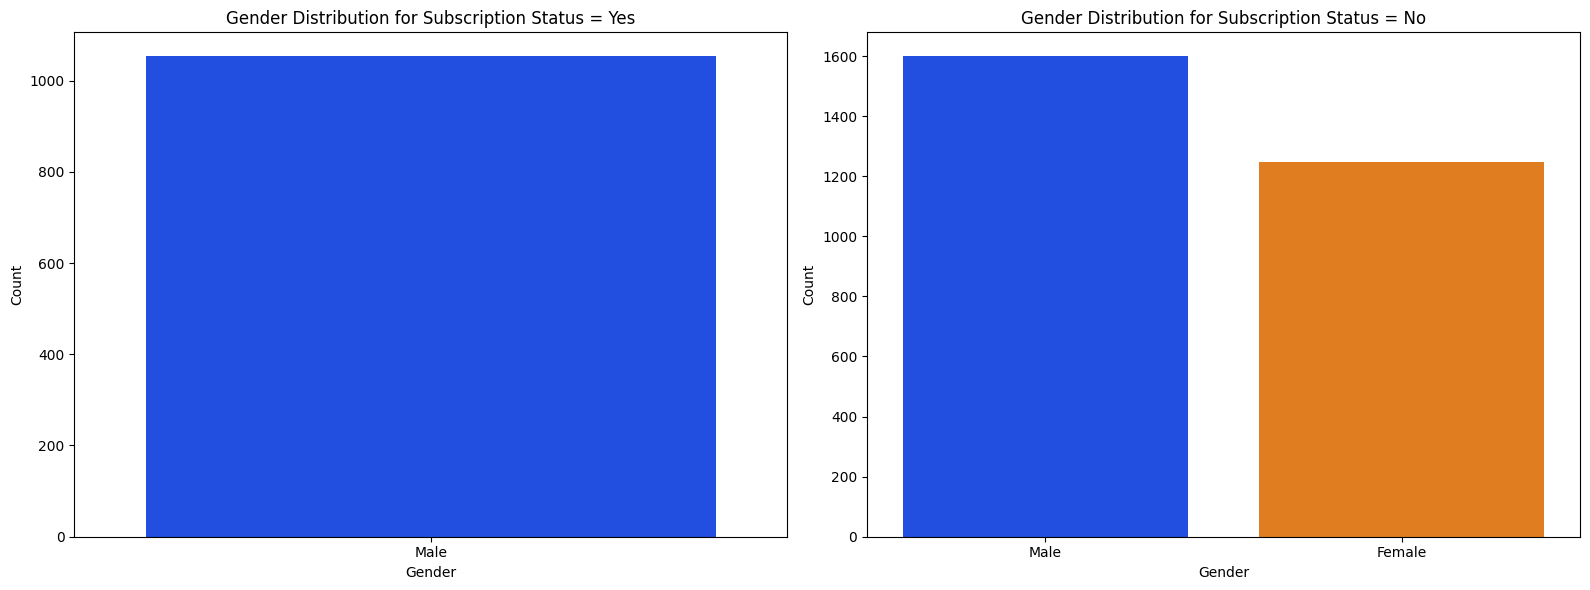

In [14]:
plt.figure(figsize=(16, 6)) 

plt.subplot(1, 2, 1) 
subset_yes = df[df['Subscription Status'] == 'Yes']
sns.countplot(data=subset_yes, x='Gender', palette='bright')
plt.title('Gender Distribution for Subscription Status = Yes')
plt.xlabel('Gender')
plt.ylabel('Count')

plt.subplot(1, 2, 2)
subset_no = df[df['Subscription Status'] == 'No']
sns.countplot(data=subset_no, x='Gender', palette='bright')
plt.title('Gender Distribution for Subscription Status = No')
plt.xlabel('Gender')
plt.ylabel('Count')

plt.tight_layout()
plt.show()


**INSIGHT**

- As we can see there is no female customer that subscribe to our company.
- Most likely, this happened because the product we sell is not attractive enough to them.

# FEATURE ENGINEERING

In [15]:
X = df.drop(['Subscription Status'], axis=1)
y = df['Subscription Status']
X

,Age,Gender,Item Purchased,Category,Purchase Amount,Location,Size,Color,Season,Review Rating,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Express,Yes,Yes,14,Venmo,Fortnightly
1,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Express,Yes,Yes,2,Cash,Fortnightly
2,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Free Shipping,Yes,Yes,31,PayPal,Annually
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3895,40,Female,Hoodie,Clothing,28,Virginia,L,Turquoise,Summer,4.2,2-Day Shipping,No,No,32,Venmo,Weekly
3896,52,Female,Backpack,Accessories,49,Iowa,L,White,Spring,4.5,Store Pickup,No,No,41,Bank Transfer,Bi-Weekly
3897,46,Female,Belt,Accessories,33,New Jersey,L,Green,Spring,2.9,Standard,No,No,24,Venmo,Quarterly
3898,44,Female,Shoes,Footwear,77,Minnesota,S,Brown,Summer,3.8,Express,No,No,24,Venmo,Weekly


## Splitting Train and Test

I Split the data into Train and Test with ratio 7:3.

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3,random_state=3)

print('Train size : ', X_train.shape)
print('Test size  : ', X_test.shape)

Train size :  (2730, 16)
Test size  :  (1170, 16)


## Cardinality

In this process i want to remove some columns that is deem as cardinality.

**What is cardinality ?** It's when the data have alot of unique values. When we the models train itself, it will calculate more variable and making the calculations too complex. Hence we need to handle it.

In [17]:
obj_col = X_train.select_dtypes(include=['object'])
for cat in obj_col:
  count = len(X_train[cat].unique())
  print(f"Cardinality of column {cat} is {count}")

Cardinality of column Gender is 2
Cardinality of column Item Purchased is 25
Cardinality of column Category is 4
Cardinality of column Location is 50
Cardinality of column Size is 4
Cardinality of column Color is 25
Cardinality of column Season is 4
Cardinality of column Shipping Type is 6
Cardinality of column Discount Applied is 2
Cardinality of column Promo Code Used is 2
Cardinality of column Payment Method is 6
Cardinality of column Frequency of Purchases is 7


According to the output above there are 3 columns that have high unique. Which is 'Item Purchased', 'Location' and 'Color'.

For 'Item Purchased' and 'Color' i decided to not handle it. The reason is that these two columns I believe are important to keep around. These columns function as specification of the product that is bought. For example, maybe our customer likely to subscribe because they loves buying "Pink" "Sweaters". I don't want to lose these columns so i keep it.

In [18]:
df['Item Purchased'].unique()

array(['Blouse', 'Sweater', 'Jeans', 'Sandals', 'Sneakers', 'Shirt',
       'Shorts', 'Coat', 'Handbag', 'Shoes', 'Dress', 'Skirt',
       'Sunglasses', 'Pants', 'Jacket', 'Hoodie', 'Jewelry', 'T-shirt',
       'Scarf', 'Hat', 'Socks', 'Backpack', 'Belt', 'Boots', 'Gloves'],
      dtype=object)

In [19]:
df['Color'].unique()

array(['Gray', 'Maroon', 'Turquoise', 'White', 'Charcoal', 'Silver',
       'Pink', 'Purple', 'Olive', 'Gold', 'Violet', 'Teal', 'Lavender',
       'Black', 'Green', 'Peach', 'Red', 'Cyan', 'Brown', 'Beige',
       'Orange', 'Indigo', 'Yellow', 'Magenta', 'Blue'], dtype=object)

As for Location the 50 states in America is too big. If i want to predict whether or not someone will subscribe, it will be more relevant if we are talking about salary class. Not the location they lived. So i ends up dropping this columns.

In [20]:
df['Location'].unique()

array(['Kentucky', 'Maine', 'Massachusetts', 'Rhode Island', 'Oregon',
       'Wyoming', 'Montana', 'Louisiana', 'West Virginia', 'Missouri',
       'Arkansas', 'Hawaii', 'Delaware', 'New Hampshire', 'New York',
       'Alabama', 'Mississippi', 'North Carolina', 'California',
       'Oklahoma', 'Florida', 'Texas', 'Nevada', 'Kansas', 'Colorado',
       'North Dakota', 'Illinois', 'Indiana', 'Arizona', 'Alaska',
       'Tennessee', 'Ohio', 'New Jersey', 'Maryland', 'Vermont',
       'New Mexico', 'South Carolina', 'Idaho', 'Pennsylvania',
       'Connecticut', 'Utah', 'Virginia', 'Georgia', 'Nebraska', 'Iowa',
       'South Dakota', 'Minnesota', 'Washington', 'Wisconsin', 'Michigan'],
      dtype=object)

In [21]:
X_train.drop(['Location'], axis=1, inplace=True)

In [22]:
X_test.drop(['Location'], axis=1, inplace=True)

## Outliers

In this datasets i want to handle the outliers. But before that lets check how skewwed this datasets.

At EDA i show simple visualization for 'Age', 'Purhase Amount', 'Review Rating' and 'Previous Purchases'. I did not found any significant outliers in EDA Process. But to make sure that no outliers exist, i gotta check it first. 

In [23]:
num_cols = list(X_train.select_dtypes(exclude='object').columns)

listItem= []

for col in num_cols:
  listItem.append([col, round(X_train[col].skew(),1), np.where(
    (round(X_train[col].skew(),1) <= 0.5) & (round(X_train[col].skew(),1) >= -0.5),
    'normal',
    'skewed')])

skewness = pd.DataFrame(columns=['nama kolom', 'nilai skewness', 'distribution'], data= listItem)
skewness


,nama kolom,nilai skewness,distribution
0,Age,-0.0,normal
1,Purchase Amount,-0.0,normal
2,Review Rating,0.0,normal
3,Previous Purchases,0.0,normal


AS we can see the data distributed normal. What a perfect datasets. So i did not have to do anything here.

## Column Transformer

First i will encode my target first using label encoder because the values are binary (yes/no).

In [24]:
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)

In this project i want to use 2 encoder. OhneHotEncoder and LabelEncoder. 

- Columns that will use OhneHotEncoder are as follow : ['Item Purchased', 'Category', 'Size', 'Season', 'Shipping Type', 'Payment Method']. 

- And the rest that will use LabelEncoder are these columns : ['Discount Applied', 'Promo Code Used', 'Gender']

Here i want to check how the encoder change the data.

We can see below that 'Yes' will be change to 1.

And 'No' will be 0. 

In [25]:
label_encoder.classes_

array(['No', 'Yes'], dtype=object)

In [26]:
y_train

array([1, 0, 0, ..., 0, 0, 0])

In [27]:
label_encoder.inverse_transform(y_train)

array(['Yes', 'No', 'No', ..., 'No', 'No', 'No'], dtype=object)

Function Below is for LabelEncoder. So LabelEncoder will have the outcome that is 1D. But we need a 2D output after encoding. So this function will be called inside 'FunctionTransfomer' to make sure that it applied on 2D dataset.

In [204]:
def label_encode_column(X_train):
    le = LabelEncoder()
    return X_train.apply(lambda col: le.fit_transform(col))

This is the transformer i made, there are 3 things on this transformer.

- scaler, i use standard scaler for scalling the numerical columns.
- one hot encoder, i use it for categorical columns that have more that 2 unique value.
- label encoder, i use it for categorical columns that have binary values such as yes or no. The same case as encoder that 1 use on target.

In [205]:
transformer = ColumnTransformer([
    ('scaler', StandardScaler(), selector(dtype_exclude='object')),
    ('one_hot_encode', OneHotEncoder(), ['Item Purchased', 'Category', 'Size', 'Season', 'Shipping Type', 'Payment Method']),
    ('label_encode', FunctionTransformer(label_encode_column, validate=False), ['Discount Applied', 'Promo Code Used', 'Gender'])
])

# MODEL DEFINITION

In this project my objective is not only to predict whether or not someone subscribe, but also to evaluates different kind of algorithms that used for model. 

In this process, I created five pipelines using five different estimators. The estimator that i use is :
```
- K-Nearest Neighbors (KNN)
- Support Vector Machine (SVM)
- Decision Tree
- Random Forest
- XGBoost
```

The codes below to define pipeline for each estimator.

I called transformer that i made before inside the pipeline.

In [206]:
# K-Nearest Neighbors (KNN)
pipe_knn = Pipeline([
    ('transformer', transformer),
    ('classifier', KNeighborsClassifier())
])

# Support Vector Machine (SVM)
pipe_svm = Pipeline([
    ('transformer', transformer),
    ('classifier', SVC())
])

# Decision Tree
pipe_dt = Pipeline([
('transformer', transformer),
('classifier', DecisionTreeClassifier())
])

# Random Forest
pipe_rf = Pipeline([
('transformer', transformer),
('classifier', RandomForestClassifier())
])

#XGBoost
pipe_xgb = Pipeline([
('transformer', transformer),
('classifier', XGBClassifier())
])

# MODEL TRAINING

## K-NEAREST NEIGHBOR (KNN)

In [207]:
pipe_knn.fit(X_train, y_train)
print('Training Score: ',round(pipe_knn.score(X_train, y_train),4))
print('Testing Score: ', round(pipe_knn.score(X_test, y_test),4))

Training Score:  0.8733
Testing Score:  0.812


## SUPPORT VECTOR MACHINE (SVM)

In [208]:
pipe_svm.fit(X_train, y_train)
print('Training Score: ',round(pipe_svm.score(X_train, y_train),4))
print('Testing Score: ', round(pipe_svm.score(X_test, y_test),4))

Training Score:  0.8571
Testing Score:  0.8333


## DECISION TREE

In [209]:
pipe_dt.fit(X_train, y_train)
print('Training Score: ',round(pipe_dt.score(X_train, y_train),4))
print('Testing Score: ', round(pipe_dt.score(X_test, y_test),4))

Training Score:  1.0
Testing Score:  0.7932


## RANDOM FOREST

In [210]:
pipe_rf.fit(X_train, y_train)
print('Training Score: ',round(pipe_rf.score(X_train, y_train),4))
print('Testing Score: ', round(pipe_rf.score(X_test, y_test),4))

Training Score:  1.0
Testing Score:  0.8256


## XGBOOST

In [211]:
pipe_xgb.fit(X_train, y_train)
print('Training Score: ',round(pipe_xgb.score(X_train, y_train),4))
print('Testing Score: ', round(pipe_xgb.score(X_test, y_test),4))

Training Score:  1.0
Testing Score:  0.8222


The highest Testing Score between all estimators is 'Decision Tree'.

But we can't make final decision for the best of them just from here.

# MODEL EVALUATION

In this Model Evaluation i will use F1-Scores Metric to evaluates the model.

**REASON:** 

As a company we want to predict whether the customer subscribe or not. We want to avoid this results :

- FALSE NEGATIVE result, it mean the model predicts NEGATIVE (Not Subscribe) but the customer is actually POSITIVE (Subscribe). That mean we **will lose potential subscriber**. In this case we want to focus on **Recall**.
- FALSE POSITIVE result, it mean the model predicts POSITIVE (Subscribe) but the customer is actually NEGATVIE (Not Subscribe). That mean we **will get missinformation about the success of our membership campaign**. We don't want that to happen because we don't know what to improve if our subscriber. In this case we want to focus on **Precision**.
+ **In this project we want to minimalize both of the above problem therefore we use F1-Scores Metric Evaluation.**

Below are F1-scores for each estimator before 'Hyperparameter Tuning'.

In Model Evaluation i also put Cross Validation.

**Cross Validation**
- In Cross Validation i will use a function for calculating F1-score.
- The output will be :
1. [X times F1 Score, where X = Fold values] example : with 3 folds [0.67318982 0.64426877 0.61322645], 
2. [Mean of those F1 Score], 
3. [Std of those F1 Score] 
4. and lastly [Range of F1 Score (Min F1 Score to Max F1 Score)]

**for more explanation about Cross Validation will be answered in 'CONCEPTUAL PROBLEMS'**

**What information can i take from Cross Validation ?**

1. The Higher F1 Score the better model can predict.
2. And of course the higher F1 Score the better.
3. STD from list of F1 Scores shows the consistency of the prediction.

## KNN

Predict with KNN.

In [212]:
y_knn_pred = pipe_knn.predict(X_test)
y_knn_pred

array([0, 1, 0, ..., 0, 0, 0])

Below here is Classification Report that cointain the F1-Score from prediction result of KNN.

In [213]:
target = ['Not Subscribe', 'Subscribe']
print(classification_report(y_test, y_knn_pred, target_names = target))

               precision    recall  f1-score   support

Not Subscribe       0.88      0.86      0.87       868
    Subscribe       0.63      0.67      0.65       302

     accuracy                           0.81      1170
    macro avg       0.75      0.77      0.76      1170
 weighted avg       0.82      0.81      0.81      1170



### CROSS VALIDATION

And below here is the cross validation for F1-score.
- Here i use 3 fold (cv=3)

In [214]:
f1_train_cross_val = cross_val_score(pipe_knn,
                                     X_train,
                                     y_train,
                                     cv=3,
                                     scoring="f1")

print('F1 Score - All - Cross Validation  : ', f1_train_cross_val)
print('F1 Score - Mean - Cross Validation : ', f1_train_cross_val.mean())
print('F1 Score - Std - Cross Validation  : ', f1_train_cross_val.std())
print('F1 Score - Range of Test-Set       : ', (f1_train_cross_val.mean()-f1_train_cross_val.std()) , '-', (f1_train_cross_val.mean()+f1_train_cross_val.std()))

F1 Score - All - Cross Validation  :  [0.67318982 0.64426877 0.61322645]
F1 Score - Mean - Cross Validation :  0.6435616838280414
F1 Score - Std - Cross Validation  :  0.024485049147312605
F1 Score - Range of Test-Set       :  0.6190766346807287 - 0.668046732975354


From the output we got :
- 3 fold's F1 score and the F1 score's mean from KNN is neither high nor low. It is Average at best.
- STD is quite low, but this is good. The lower the STD mean the lower the distribution. Which mean consistent. For example, let's say the F1 scores that i obtained are: [0.8, 0.7, 0.2]. The STD will be high because 0.8 is way higher than 0.2, making it inconsistent

Next i will show the other 'Classification Report' and 'Cross Validation' but not going to explain it one by one. And i will not going to compare each of them.

**The comparison will be done after hyperparameter tuning**

## SVM

In [215]:
y_svm_pred = pipe_svm.predict(X_test)
y_svm_pred

array([0, 1, 0, ..., 1, 0, 0])

In [216]:
target = ['Not Subscribe', 'Subscribe']
print(classification_report(y_test, y_svm_pred, target_names = target))

               precision    recall  f1-score   support

Not Subscribe       0.99      0.78      0.87       868
    Subscribe       0.61      0.98      0.75       302

     accuracy                           0.83      1170
    macro avg       0.80      0.88      0.81      1170
 weighted avg       0.89      0.83      0.84      1170



### CROSS VALIDATION

In [217]:
f1_train_cross_val = cross_val_score(pipe_svm,
                                     X_train,
                                     y_train,
                                     cv=3,
                                     scoring="f1")

print('F1 Score - All - Cross Validation  : ', f1_train_cross_val)
print('F1 Score - Mean - Cross Validation : ', f1_train_cross_val.mean())
print('F1 Score - Std - Cross Validation  : ', f1_train_cross_val.std())
print('F1 Score - Range of Test-Set       : ', (f1_train_cross_val.mean()-f1_train_cross_val.std()) , '-', (f1_train_cross_val.mean()+f1_train_cross_val.std()))

F1 Score - All - Cross Validation  :  [0.77237049 0.77934272 0.77449456]
F1 Score - Mean - Cross Validation :  0.7754025888086864
F1 Score - Std - Cross Validation  :  0.0029179229563582026
F1 Score - Range of Test-Set       :  0.7724846658523282 - 0.7783205117650446


## DECISION TREE

In [218]:
y_dt_pred = pipe_dt.predict(X_test)
y_dt_pred

array([0, 1, 0, ..., 0, 0, 0])

In [219]:
target = ['Not Subscribe', 'Subscribe']
print(classification_report(y_test, y_dt_pred, target_names = target))

               precision    recall  f1-score   support

Not Subscribe       0.86      0.86      0.86       868
    Subscribe       0.60      0.61      0.60       302

     accuracy                           0.79      1170
    macro avg       0.73      0.73      0.73      1170
 weighted avg       0.79      0.79      0.79      1170



### CROSS VALIDATION

In [220]:
f1_train_cross_val = cross_val_score(pipe_dt,
                                     X_train,
                                     y_train,
                                     cv=3,
                                     scoring="f1")

print('F1 Score - All - Cross Validation  : ', f1_train_cross_val)
print('F1 Score - Mean - Cross Validation : ', f1_train_cross_val.mean())
print('F1 Score - Std - Cross Validation  : ', f1_train_cross_val.std())
print('F1 Score - Range of Test-Set       : ', (f1_train_cross_val.mean()-f1_train_cross_val.std()) , '-', (f1_train_cross_val.mean()+f1_train_cross_val.std()))

F1 Score - All - Cross Validation  :  [0.64621677 0.61728395 0.62301587]
F1 Score - Mean - Cross Validation :  0.6288388641831041
F1 Score - Std - Cross Validation  :  0.012508861213265767
F1 Score - Range of Test-Set       :  0.6163300029698383 - 0.6413477253963699


## RANDOM FOREST

In [221]:
y_rf_pred = pipe_rf.predict(X_test)
y_rf_pred

array([0, 1, 0, ..., 1, 0, 0])

In [222]:
target = ['Not Subscribe', 'Subscribe']
print(classification_report(y_test, y_rf_pred, target_names = target))

               precision    recall  f1-score   support

Not Subscribe       0.94      0.82      0.87       868
    Subscribe       0.62      0.85      0.72       302

     accuracy                           0.83      1170
    macro avg       0.78      0.83      0.80      1170
 weighted avg       0.86      0.83      0.83      1170



### CROSS VALIDATION

In [223]:
f1_train_cross_val = cross_val_score(pipe_rf,
                                     X_train,
                                     y_train,
                                     cv=3,
                                     scoring="f1")

print('F1 Score - All - Cross Validation  : ', f1_train_cross_val)
print('F1 Score - Mean - Cross Validation : ', f1_train_cross_val.mean())
print('F1 Score - Std - Cross Validation  : ', f1_train_cross_val.std())
print('F1 Score - Range of Test-Set       : ', (f1_train_cross_val.mean()-f1_train_cross_val.std()) , '-', (f1_train_cross_val.mean()+f1_train_cross_val.std()))

F1 Score - All - Cross Validation  :  [0.72945205 0.76369863 0.73809524]
F1 Score - Mean - Cross Validation :  0.743748641008915
F1 Score - Std - Cross Validation  :  0.014541382420528258
F1 Score - Range of Test-Set       :  0.7292072585883868 - 0.7582900234294433


## XGBoost

In [224]:
y_xgb_pred = pipe_xgb.predict(X_test)
y_xgb_pred

array([0, 1, 0, ..., 0, 0, 0])

In [225]:
target = ['Not Subscribe', 'Subscribe']
print(classification_report(y_test, y_xgb_pred, target_names = target))

               precision    recall  f1-score   support

Not Subscribe       0.91      0.85      0.88       868
    Subscribe       0.63      0.75      0.68       302

     accuracy                           0.82      1170
    macro avg       0.77      0.80      0.78      1170
 weighted avg       0.83      0.82      0.83      1170



### CROSS VALIDATION

In [226]:
f1_train_cross_val = cross_val_score(pipe_rf,
                                     X_train,
                                     y_train,
                                     cv=3,
                                     scoring="f1")

print('F1 Score - All - Cross Validation  : ', f1_train_cross_val)
print('F1 Score - Mean - Cross Validation : ', f1_train_cross_val.mean())
print('F1 Score - Std - Cross Validation  : ', f1_train_cross_val.std())
print('F1 Score - Range of Test-Set       : ', (f1_train_cross_val.mean()-f1_train_cross_val.std()) , '-', (f1_train_cross_val.mean()+f1_train_cross_val.std()))

F1 Score - All - Cross Validation  :  [0.74074074 0.74657534 0.71575342]
F1 Score - Mean - Cross Validation :  0.7343565026213428
F1 Score - Std - Cross Validation  :  0.013368284023963424
F1 Score - Range of Test-Set       :  0.7209882185973794 - 0.7477247866453062


# HYPERPARAMETER TUNING

In this process i want to get the best parameter for each estimator. Because one of my objective is to get the best model for predictions, i need to get the best parameter for every model.

## KNN

First i create variable below for making list of parameters that will be an input for Function GridSearch.

In [227]:
param_knn = {
    'transformer__scaler' : [StandardScaler(), MinMaxScaler()],
    'classifier__n_neighbors' : [5,6,7,8,9,10]
}

Next i create variabe grid_knn. It contain Function GridSearchCV.

In [228]:
grid_knn = GridSearchCV(pipe_knn, param_knn, cv=5).fit(X_train, y_train)

In [229]:
print('Train Set Score : ', grid_knn.score(X_train, y_train))
print('Test Set Score : ', grid_knn.score(X_test, y_test))

Train Set Score :  0.8556776556776556
Test Set Score :  0.8102564102564103


In [230]:
best_param_knn = grid_knn.best_params_
print(best_param_knn)
print('\n')
best_pipe_knn = grid_knn.best_estimator_
print(best_pipe_knn)
print('\n')
result_df_knn = pd.DataFrame.from_dict(grid_knn.cv_results_, orient='columns')
print(result_df_knn.columns)

{'classifier__n_neighbors': 9, 'transformer__scaler': StandardScaler()}


Pipeline(steps=[('transformer',
                 ColumnTransformer(transformers=[('scaler', StandardScaler(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x000001E9A89F7730>),
                                                 ('one_hot_encode',
                                                  OneHotEncoder(),
                                                  ['Item Purchased', 'Category',
                                                   'Size', 'Season',
                                                   'Shipping Type',
                                                   'Payment Method']),
                                                 ('label_encode',
                                                  FunctionTransformer(func=<function label_encode_column at 0x000001E9ACE8F400>),
                                                  ['Disc

The code above have 2 output.

1. printing best parameter.
2. new pipelines (best_pipe_knn) with best parameter that can be use for training.

## SVM

In [231]:
param_svm = {
    'transformer__scaler' : [StandardScaler(), MinMaxScaler()],
    'classifier__C' : [0.001,0.01,0.1,1,10,100]
}

In [232]:
grid_svm = GridSearchCV(pipe_svm, param_svm, cv=5).fit(X_train, y_train)

In [233]:
print('Train Set Score : ', grid_svm.score(X_train, y_train))
print('Test Set Score : ', grid_svm.score(X_test, y_test))

Train Set Score :  0.8421245421245421
Test Set Score :  0.8350427350427351


In [234]:
best_param_svm = grid_svm.best_params_
print(best_param_svm)
print('\n')
best_pipe_svm = grid_svm.best_estimator_
print(best_pipe_svm)
print('\n')
result_df_svm = pd.DataFrame.from_dict(grid_svm.cv_results_, orient='columns')
print(result_df_svm.columns)

{'classifier__C': 0.1, 'transformer__scaler': StandardScaler()}


Pipeline(steps=[('transformer',
                 ColumnTransformer(transformers=[('scaler', StandardScaler(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x000001E9A8B63F40>),
                                                 ('one_hot_encode',
                                                  OneHotEncoder(),
                                                  ['Item Purchased', 'Category',
                                                   'Size', 'Season',
                                                   'Shipping Type',
                                                   'Payment Method']),
                                                 ('label_encode',
                                                  FunctionTransformer(func=<function label_encode_column at 0x000001E9ACE8F400>),
                                                  ['Discount App

## DECISION TREE

In [235]:
param_dt = {
    'transformer__scaler' : [StandardScaler(), MinMaxScaler()],
    'classifier__max_depth' : [3,4,5,6,7,8]
}

In [236]:
grid_dt = GridSearchCV(pipe_dt, param_dt, cv=5).fit(X_train, y_train)

In [237]:
print('Train Set Score : ', grid_dt.score(X_train, y_train))
print('Test Set Score : ', grid_dt.score(X_test, y_test))

Train Set Score :  0.8483516483516483
Test Set Score :  0.8384615384615385


In [238]:
best_param_dt = grid_dt.best_params_
print(best_param_dt)
print('\n')
best_pipe_dt = grid_dt.best_estimator_
print(best_pipe_dt)
print('\n')
result_df_dt = pd.DataFrame.from_dict(grid_dt.cv_results_, orient='columns')
print(result_df_dt.columns)

{'classifier__max_depth': 4, 'transformer__scaler': StandardScaler()}


Pipeline(steps=[('transformer',
                 ColumnTransformer(transformers=[('scaler', StandardScaler(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x000001E9A89ACF70>),
                                                 ('one_hot_encode',
                                                  OneHotEncoder(),
                                                  ['Item Purchased', 'Category',
                                                   'Size', 'Season',
                                                   'Shipping Type',
                                                   'Payment Method']),
                                                 ('label_encode',
                                                  FunctionTransformer(func=<function label_encode_column at 0x000001E9ACE8F400>),
                                                  ['Discou

## RANDOM FOREST

In [239]:
param_rf = {
    'transformer__scaler' : [StandardScaler(), MinMaxScaler()],
    'classifier__max_depth' : [3,4,5,6,7,8]
}

In [240]:
grid_rf = GridSearchCV(pipe_rf, param_rf, cv=5).fit(X_train, y_train)

In [241]:
print('Train Set Score : ', grid_rf.score(X_train, y_train))
print('Test Set Score : ', grid_rf.score(X_test, y_test))

Train Set Score :  0.8666666666666667
Test Set Score :  0.8367521367521368


In [242]:
best_param_rf = grid_rf.best_params_
print(best_param_rf)
print('\n')
best_pipe_rf = grid_rf.best_estimator_
print(best_pipe_rf)
print('\n')
result_df_rf = pd.DataFrame.from_dict(grid_rf.cv_results_, orient='columns')
print(result_df_rf.columns)

{'classifier__max_depth': 7, 'transformer__scaler': StandardScaler()}


Pipeline(steps=[('transformer',
                 ColumnTransformer(transformers=[('scaler', StandardScaler(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x000001E9A89AF1F0>),
                                                 ('one_hot_encode',
                                                  OneHotEncoder(),
                                                  ['Item Purchased', 'Category',
                                                   'Size', 'Season',
                                                   'Shipping Type',
                                                   'Payment Method']),
                                                 ('label_encode',
                                                  FunctionTransformer(func=<function label_encode_column at 0x000001E9ACE8F400>),
                                                  ['Discou

## XGBOOST

In [243]:
param_xgb = {
    'transformer__scaler' : [StandardScaler(), MinMaxScaler()],
    'classifier__max_depth' : [3,4,5,6,7,8]
}

In [244]:
grid_xgb = GridSearchCV(pipe_xgb, param_xgb, cv=5).fit(X_train, y_train)

In [245]:
print('Train Set Score : ', grid_xgb.score(X_train, y_train))
print('Test Set Score : ', grid_xgb.score(X_test, y_test))

Train Set Score :  0.9974358974358974
Test Set Score :  0.8162393162393162


In [246]:
best_param_xgb = grid_xgb.best_params_
print(best_param_xgb)
print('\n')
best_pipe_xgb = grid_xgb.best_estimator_
print(best_pipe_xgb)
print('\n')
result_df_xgb = pd.DataFrame.from_dict(grid_xgb.cv_results_, orient='columns')
print(result_df_xgb.columns)

{'classifier__max_depth': 5, 'transformer__scaler': StandardScaler()}


Pipeline(steps=[('transformer',
                 ColumnTransformer(transformers=[('scaler', StandardScaler(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x000001E9AD470E20>),
                                                 ('one_hot_encode',
                                                  OneHotEncoder(),
                                                  ['Item Purchased', 'Category',
                                                   'Size', 'Season',
                                                   'Shipping Type',
                                                   'Payment Method']),
                                                 ('label_encode',
                                                  FunctionTransformer(func=<function label_encode_...
                               feature_types=None, gamma=None, grow_policy=None,
     

# MODEL EVALUATION AFTER HYPERPARAMETER TUNING

First i'm going to show the 'Classification Report' and 'Cross Validation' for each model like i did in 'MODEL EVALUATION'.

And at the end of this Process i will compare each peformance of the model.

## KNN

In [247]:
y_best_knn_pred = best_pipe_knn.predict(X_test)
y_best_knn_pred

array([0, 1, 0, ..., 1, 0, 0])

In [248]:
target = ['Not Subscribe', 'Subscribe']
print(classification_report(y_test, y_best_knn_pred, target_names = target))

               precision    recall  f1-score   support

Not Subscribe       0.89      0.85      0.87       868
    Subscribe       0.62      0.69      0.65       302

     accuracy                           0.81      1170
    macro avg       0.75      0.77      0.76      1170
 weighted avg       0.82      0.81      0.81      1170



### CROSS VALIDATION

In [249]:
f1_train_cross_val = cross_val_score(best_pipe_knn,
                                     X_train,
                                     y_train,
                                     cv=3,
                                     scoring="f1")

print('F1 Score - All - Cross Validation  : ', f1_train_cross_val)
print('F1 Score - Mean - Cross Validation : ', f1_train_cross_val.mean())
print('F1 Score - Std - Cross Validation  : ', f1_train_cross_val.std())
print('F1 Score - Range of Test-Set       : ', (f1_train_cross_val.mean()-f1_train_cross_val.std()) , '-', (f1_train_cross_val.mean()+f1_train_cross_val.std()))

F1 Score - All - Cross Validation  :  [0.70633397 0.65891473 0.66138614]
F1 Score - Mean - Cross Validation :  0.6755449468082103
F1 Score - Std - Cross Validation  :  0.02179449583542908
F1 Score - Range of Test-Set       :  0.6537504509727813 - 0.6973394426436393


## SVM

In [250]:
y_best_svm_pred = best_pipe_svm.predict(X_test)
y_best_svm_pred

array([0, 1, 0, ..., 1, 0, 0])

In [251]:
target = ['Not Subscribe', 'Subscribe']
print(classification_report(y_test, y_best_svm_pred, target_names = target))

               precision    recall  f1-score   support

Not Subscribe       1.00      0.78      0.87       868
    Subscribe       0.61      1.00      0.76       302

     accuracy                           0.84      1170
    macro avg       0.81      0.89      0.82      1170
 weighted avg       0.90      0.84      0.84      1170



### CROSS VALIDATION

In [252]:
f1_train_cross_val = cross_val_score(best_pipe_svm,
                                     X_train,
                                     y_train,
                                     cv=3,
                                     scoring="f1")

print('F1 Score - All - Cross Validation  : ', f1_train_cross_val)
print('F1 Score - Mean - Cross Validation : ', f1_train_cross_val.mean())
print('F1 Score - Std - Cross Validation  : ', f1_train_cross_val.std())
print('F1 Score - Range of Test-Set       : ', (f1_train_cross_val.mean()-f1_train_cross_val.std()) , '-', (f1_train_cross_val.mean()+f1_train_cross_val.std()))

F1 Score - All - Cross Validation  :  [0.7788162  0.77691108 0.77399381]
F1 Score - Mean - Cross Validation :  0.7765736946231802
F1 Score - Std - Cross Validation  :  0.0019831346227561514
F1 Score - Range of Test-Set       :  0.774590560000424 - 0.7785568292459363


## DECISION TREE

In [253]:
y_best_dt_pred = best_pipe_dt.predict(X_test)
y_best_dt_pred

array([0, 1, 0, ..., 1, 0, 0])

In [254]:
target = ['Not Subscribe', 'Subscribe']
print(classification_report(y_test, y_best_dt_pred, target_names = target))

               precision    recall  f1-score   support

Not Subscribe       0.99      0.79      0.88       868
    Subscribe       0.62      0.99      0.76       302

     accuracy                           0.84      1170
    macro avg       0.81      0.89      0.82      1170
 weighted avg       0.90      0.84      0.85      1170



### CROSS VALIDATION

In [255]:
f1_train_cross_val = cross_val_score(best_pipe_dt,
                                     X_train,
                                     y_train,
                                     cv=3,
                                     scoring="f1")

print('F1 Score - All - Cross Validation  : ', f1_train_cross_val)
print('F1 Score - Mean - Cross Validation : ', f1_train_cross_val.mean())
print('F1 Score - Std - Cross Validation  : ', f1_train_cross_val.std())
print('F1 Score - Range of Test-Set       : ', (f1_train_cross_val.mean()-f1_train_cross_val.std()) , '-', (f1_train_cross_val.mean()+f1_train_cross_val.std()))

F1 Score - All - Cross Validation  :  [0.76825397 0.76677316 0.76825397]
F1 Score - Mean - Cross Validation :  0.7677603664824112
F1 Score - Std - Cross Validation  :  0.0006980583197474196
F1 Score - Range of Test-Set       :  0.7670623081626637 - 0.7684584248021586


## RANDOM FOREST

In [256]:
y_best_rf_pred = best_pipe_rf.predict(X_test)
y_best_rf_pred

array([0, 1, 0, ..., 1, 0, 0])

In [257]:
target = ['Not Subscribe', 'Subscribe']
print(classification_report(y_test, y_best_rf_pred, target_names = target))

               precision    recall  f1-score   support

Not Subscribe       1.00      0.78      0.88       868
    Subscribe       0.61      0.99      0.76       302

     accuracy                           0.84      1170
    macro avg       0.81      0.89      0.82      1170
 weighted avg       0.90      0.84      0.85      1170



### CROSS VALIDATION

In [258]:
f1_train_cross_val = cross_val_score(best_pipe_rf,
                                     X_train,
                                     y_train,
                                     cv=3,
                                     scoring="f1")

print('F1 Score - All - Cross Validation  : ', f1_train_cross_val)
print('F1 Score - Mean - Cross Validation : ', f1_train_cross_val.mean())
print('F1 Score - Std - Cross Validation  : ', f1_train_cross_val.std())
print('F1 Score - Range of Test-Set       : ', (f1_train_cross_val.mean()-f1_train_cross_val.std()) , '-', (f1_train_cross_val.mean()+f1_train_cross_val.std()))

F1 Score - All - Cross Validation  :  [0.7576244  0.76461295 0.76923077]
F1 Score - Mean - Cross Validation :  0.7638227071636732
F1 Score - Std - Cross Validation  :  0.00477111661464654
F1 Score - Range of Test-Set       :  0.7590515905490266 - 0.7685938237783198


## XGBoost

In [259]:
y_best_xgb_pred = best_pipe_xgb.predict(X_test)
y_best_xgb_pred

array([0, 1, 0, ..., 0, 0, 0])

In [260]:
target = ['Not Subscribe', 'Subscribe']
print(classification_report(y_test, y_best_xgb_pred, target_names = target))

               precision    recall  f1-score   support

Not Subscribe       0.90      0.84      0.87       868
    Subscribe       0.62      0.75      0.68       302

     accuracy                           0.82      1170
    macro avg       0.76      0.79      0.77      1170
 weighted avg       0.83      0.82      0.82      1170



### CROSS VALIDATION

In [261]:
f1_train_cross_val = cross_val_score(best_pipe_xgb,
                                     X_train,
                                     y_train,
                                     cv=3,
                                     scoring="f1")

print('F1 Score - All - Cross Validation  : ', f1_train_cross_val)
print('F1 Score - Mean - Cross Validation : ', f1_train_cross_val.mean())
print('F1 Score - Std - Cross Validation  : ', f1_train_cross_val.std())
print('F1 Score - Range of Test-Set       : ', (f1_train_cross_val.mean()-f1_train_cross_val.std()) , '-', (f1_train_cross_val.mean()+f1_train_cross_val.std()))

F1 Score - All - Cross Validation  :  [0.67917448 0.68181818 0.70609982]
F1 Score - Mean - Cross Validation :  0.689030827009277
F1 Score - Std - Cross Validation  :  0.01211775699163111
F1 Score - Range of Test-Set       :  0.6769130700176459 - 0.7011485840009081


## COMPARING EACH ESTIMATOR

Here i will compare each estimator with their best parameter.

In [262]:
models = {
    'KNN' : best_pipe_knn,
    'SVM' : best_pipe_svm,
    'Decision Tree' : best_pipe_dt,
    'Random Forest' : best_pipe_rf,
    'XGBoost' : best_pipe_xgb
}

metrics = {
    'Accuracy' : accuracy_score,
    'F1-Score' : f1_score,
}

df_model = pd.DataFrame(columns = models.keys(), index=['Accuracy', 'F1-Score'])

for metric in metrics.keys():
  for model in models.keys():
    df_model.loc[metric, model] = metrics[metric](y_test, models[model].predict(X_test))

In [263]:
df_model

,KNN,SVM,Decision Tree,Random Forest,XGBoost
Accuracy,0.810256,0.835043,0.838462,0.836752,0.816239
F1-Score,0.653125,0.757842,0.759236,0.758534,0.676692


- As we can see, the best estimator that can be used for this datasets based on F1-Scores is **'Decision Tree'** followed by 'Random Forest' and 'SVM' with slight difference.

# MODEL SAVING

I going to save Decision Tree Model with this parameter below.

In [265]:
print(best_pipe_dt)

Pipeline(steps=[('transformer',
                 ColumnTransformer(transformers=[('scaler', StandardScaler(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x000001E9A89ACF70>),
                                                 ('one_hot_encode',
                                                  OneHotEncoder(),
                                                  ['Item Purchased', 'Category',
                                                   'Size', 'Season',
                                                   'Shipping Type',
                                                   'Payment Method']),
                                                 ('label_encode',
                                                  FunctionTransformer(func=<function label_encode_column at 0x000001E9ACE8F400>),
                                                  ['Discount Applied',
                                                   'Promo C

In [264]:
pickle.dump(best_pipe_dt, open('best_model_dt.pkl', 'wb'))

# MODEL INFERENCE

To see the Model Inference, open the 'Inference' Notebook

# CONCEPTUAL PROBLEMS

#### '1. Jelaskan latar belakang adanya bagging dan cara kerja bagging ! (Explain why we need bagging and how it works !)'

**Why we need Bagging ?**

We use bagging if :
- Model have high variance.
- Model is overfitting.
- We want to increase accuracy.

**How it works ?**

I will make an example how it works.
- Lets imagine we have **4 baskets** and **4 types Fruits (10 Apple, 8 Orange, 25 Melon, 5 Grape)**.
- Then we put all of them in first basket.
- After that we **separates Apple from the rest of fruits**.
- Now we left 10 Apple in fist basket.
- Then go to second basket fill it with 3 types of fruits.
- do the same thing like before. Seperates 1 fruits from the rest.
- **Repeat until every basket filled with 1 type of fruit.**

That's roughly how bagging works.

#### '2. Jelaskan perbedaan cara kerja algoritma Random Forest dengan algoritma boosting yang Anda pilih ! (Explain the differences between how Random Forest Algorithm works and choosen Boosting algorithm !)'

1. Random Forest :
- It will make a forest (n_estimator) with the same way for every forest, then it will take the final decision for classifying by the majority of results of other Trees. 

2. XGBoost :
- As for XGBoost it will try to correct the mistake from result for previous Tree. So the last Tree will be the last result.

#### '3. Jelaskan apa yang dimaksud dengan Cross Validation ! (Explain what is Cross Validation !)'

Cross Validation is a technique for model evaluations, where we split data into folds then we train and test the data between each folds.

**How it works**
- lets say we have 50 data.
- First we split it into folds, we going to use 5 folds.
- it become [10, 10, 10, 10, 10] (5 folds). Between each of this 10, there will be 1 validation data and the rest (9) is training data.
- We will test the validation data with the training data. The output will be 'Cross Validation Value' which in this project, like i explain before in 'MODEL EVALUATION', is F1-Scores.
- Do this for every folds (split).
- Then we get 5 F1-Scores because we split it 5 times. In this project i use 3 folds.

# CONCLUSION

1. Using Hyperparameter Tuning can increase the prediction evaluation.
2. Best model that can be used for this dataset is Decision Tree. Followed by Random Forest and SVM.
3. After Deployment, I tried to predict using model with same data as the real one which have 'Subscription Status' == Yes. **But the prediction result from model is different from the real one.** 

**INSIGHT :**

- That mean **the model is may not** good enough for pedicting this datasets.
- If we only look from the F1-score evaluation for the model (0.759236), it doesn't look that bad.
- But once again, no matter what input i used on demo the result always 'Not Subscribe'.
- This may happen because the training data mostly containt 'Not Subscribe'. **The data is imbalance.**
- **Or maybe because the correlation between columns is very low as we can see at EDA.**

4. prediction on number 3 also have been done in 'Inference.ipynb'